In [3]:
!pip install statsmodels==0.11.1

Unable to create process using 'C:\Users\Yannick Ulmrich\Anaconda3\python.exe "C:\Users\Yannick Ulmrich\Anaconda3\Scripts\pip-script.py" install statsmodels==0.11.1'


In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Historical Free Cash Flows of SAP in the years Q1 2006 till Q4 2019 (in Million Dollars)
sap_hist_fcf = [1049, 1246, 1666, 2437, 1111, 1372, 0, 2137, 1600, 2130, 2610, 2778, 1757, 0, 3396, 4234, 1003, 1636, 2432, 3505, 1997, 2935, 3771, 4391, 2715, 3084, 3826, 5040, 2856, 3241, 4027, 5280, 3223, 3532, 4090, 4751, 2671, 3070, 3606, 4041, 2738, 3300, 4047, 4884, 3061, 3866, 4848, 6065, 3169, 3560, 4051, 5082, 3183, 3689, 3916, 3292] 
len(sap_hist_fcf)

56

In [49]:
df

,jahr,quartal,fcf
0,2019,Q3,"2,33"
1,2019,Q2,"1,96"
2,2019,Q1,"2,37"
3,2018,Q4,"2,84"
4,2018,Q3,"2,34"
5,2018,Q2,"2,17"
6,2018,Q1,"2,15"
7,2017,Q4,"3,77"
8,2017,Q3,"3,16"
9,2017,Q2,"2,90"


In [17]:
make_forecast(test)

NameError: name 'test' is not defined

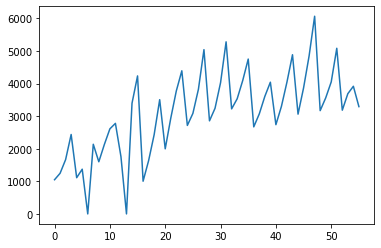

In [6]:
plt.plot(sap_hist_fcf)

In [19]:
train, test = sap_hist_fcf[:-16], sap_hist_fcf[-16:]

In [20]:
%%time
model = SARIMAX(train, order=(1,0,0), seasonal_order=(0,1,1,4), seasonal=True)
# Optional: trained_model = model.fit(cov_kwds={'approx_complex_step': True})
trained_model = model.fit()

Wall time: 158 ms


In [21]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   40
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                -293.860
Date:                             Fri, 05 Jun 2020   AIC                            593.720
Time:                                     15:49:26   BIC                            598.471
Sample:                                          0   HQIC                           595.378
                                              - 40                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3729      0.145      2.568      0.010       0.088       0.657
ma.S.L4       -0.4236      0.149     -2.841      0.004      -0.716      -0.131
sigma2      7.048e+05   1.64e+05      4.308      0.000    3.84e+05    1.03e+06
===================================================================================
Ljung-Box (Q):                       21.71   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               0.08   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
%%time
prediction = trained_model.predict(16)

Wall time: 1 ms


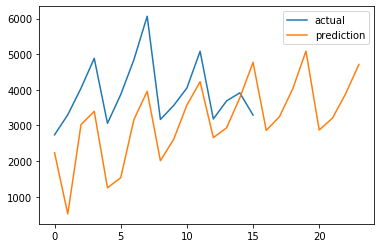

In [23]:
fig, ax = plt.subplots()
plt.plot(test, label='actual')
plt.plot(prediction, label='prediction')
plt.legend(loc = 'best')
plt.show()

In [26]:
prediction

array([ 182.47331222,  228.19014734,  260.51866612, 1295.38519954,
       1040.67322711, 1416.1505671 , 1503.00233405, 1054.57277312,
       1432.39644697,  817.00514747, 2856.45313622, 1611.59104818,
       1896.54366934, 1069.99378697, 3102.83357634, 2237.48944493])

In [20]:
import json
import pandas as pd
from flask import make_response, jsonify

In [3]:
df = pd.read_csv("../restapi/data/fcf/sap.csv", sep=";")

In [13]:
data = df.to_dict(orient = 'records')

In [14]:
data.append({"company": "sap"})

In [21]:
jsonify(data)

RuntimeError: Working outside of application context.

This typically means that you attempted to use functionality that needed
to interface with the current application object in some way. To solve
this, set up an application context with app.app_context().  See the
documentation for more information.

In [11]:
df.to_json(orient = 'records')

'[{"jahr":2019,"quartal":"Q3","fcf":"2,33"},{"jahr":2019,"quartal":"Q2","fcf":"1,96"},{"jahr":2019,"quartal":"Q1","fcf":"2,37"},{"jahr":2018,"quartal":"Q4","fcf":"2,84"},{"jahr":2018,"quartal":"Q3","fcf":"2,34"},{"jahr":2018,"quartal":"Q2","fcf":"2,17"},{"jahr":2018,"quartal":"Q1","fcf":"2,15"},{"jahr":2017,"quartal":"Q4","fcf":"3,77"},{"jahr":2017,"quartal":"Q3","fcf":"3,16"},{"jahr":2017,"quartal":"Q2","fcf":"2,90"},{"jahr":2017,"quartal":"Q1","fcf":"2,58"},{"jahr":2016,"quartal":"Q4","fcf":"3,63"},{"jahr":2016,"quartal":"Q3","fcf":"2,96"},{"jahr":2016,"quartal":"Q2","fcf":"2,52"},{"jahr":2016,"quartal":"Q1","fcf":"2,31"},{"jahr":2015,"quartal":"Q4","fcf":"3,00"},{"jahr":2015,"quartal":"Q3","fcf":"2,81"},{"jahr":2015,"quartal":"Q2","fcf":"2,50"},{"jahr":2015,"quartal":"Q1","fcf":"2,22"},{"jahr":2014,"quartal":"Q4","fcf":"2,76"},{"jahr":2014,"quartal":"Q3","fcf":"2,61"},{"jahr":2014,"quartal":"Q2","fcf":"2,27"},{"jahr":2014,"quartal":"Q1","fcf":"2,22"},{"jahr":2013,"quartal":"Q4","fcf

In [4]:
data = df.to_json(orient = 'records')

In [5]:
d = json.loads(data)

In [6]:
d.append({"company":"sap"})

In [7]:
d

[{'jahr': 2019, 'quartal': 'Q3', 'fcf': '2,33'},
 {'jahr': 2019, 'quartal': 'Q2', 'fcf': '1,96'},
 {'jahr': 2019, 'quartal': 'Q1', 'fcf': '2,37'},
 {'jahr': 2018, 'quartal': 'Q4', 'fcf': '2,84'},
 {'jahr': 2018, 'quartal': 'Q3', 'fcf': '2,34'},
 {'jahr': 2018, 'quartal': 'Q2', 'fcf': '2,17'},
 {'jahr': 2018, 'quartal': 'Q1', 'fcf': '2,15'},
 {'jahr': 2017, 'quartal': 'Q4', 'fcf': '3,77'},
 {'jahr': 2017, 'quartal': 'Q3', 'fcf': '3,16'},
 {'jahr': 2017, 'quartal': 'Q2', 'fcf': '2,90'},
 {'jahr': 2017, 'quartal': 'Q1', 'fcf': '2,58'},
 {'jahr': 2016, 'quartal': 'Q4', 'fcf': '3,63'},
 {'jahr': 2016, 'quartal': 'Q3', 'fcf': '2,96'},
 {'jahr': 2016, 'quartal': 'Q2', 'fcf': '2,52'},
 {'jahr': 2016, 'quartal': 'Q1', 'fcf': '2,31'},
 {'jahr': 2015, 'quartal': 'Q4', 'fcf': '3,00'},
 {'jahr': 2015, 'quartal': 'Q3', 'fcf': '2,81'},
 {'jahr': 2015, 'quartal': 'Q2', 'fcf': '2,50'},
 {'jahr': 2015, 'quartal': 'Q1', 'fcf': '2,22'},
 {'jahr': 2014, 'quartal': 'Q4', 'fcf': '2,76'},
 {'jahr': 2014, 'qua

In [2]:
from requests_html import HTMLSession

In [4]:
session = HTMLSession()
response = session.get('https://ycharts.com/companies/AAPL/free_cash_flow')

In [7]:
rawDates = response.html.find(".histDataTable", first=True).find(".col1")

AttributeError: 'list' object has no attribute 'find'

In [6]:
rawDates

[<Element 'th' scope='col' class=('col1', 'colHeadLrg')>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>,
 <Element 'td' class=('col1',)>]

In [18]:
currency = response.html.find("#securityQuote", first=True).find(".info")[1].text

In [19]:
currency

'USD'